In [1]:
import pandas as pd                                     #importing all necesary libraries
import numpy as np  
import seaborn as sns
import matplotlib.pyplot as plt  


In [2]:
df = pd.read_csv("housing.csv")             #loading salary_data

In [3]:
df

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0
...,...,...,...,...
484,6.593,9.67,21.0,470400.0
485,6.120,9.08,21.0,432600.0
486,6.976,5.64,21.0,501900.0
487,6.794,6.48,21.0,462000.0


In [4]:
df.isnull().sum()

RM         0
LSTAT      0
PTRATIO    0
MEDV       0
dtype: int64

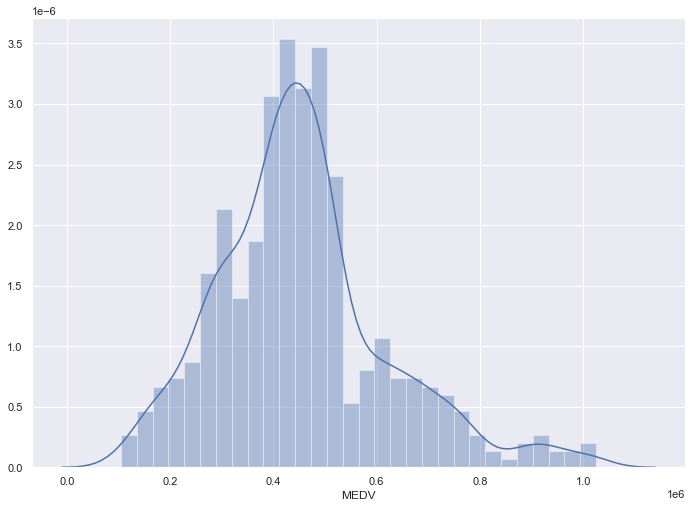

In [5]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(df['MEDV'], bins=30)
plt.show()

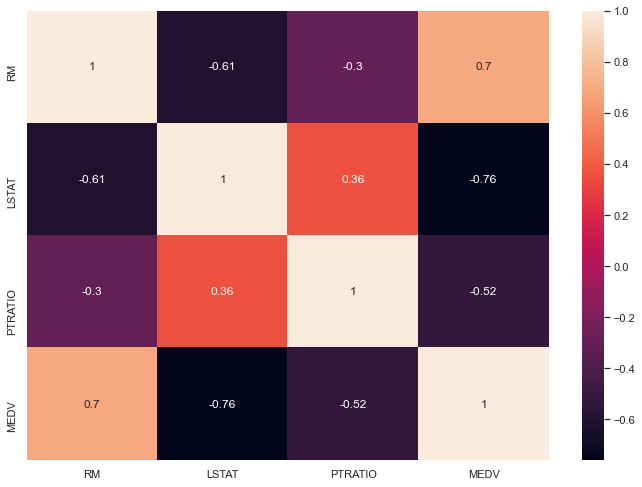

In [6]:
correlation_matrix = df.corr().round(2)                              # annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

### RM has a strong positive correlation with MEDV (0.7) where as LSTAT has a high negative correlation with MEDV(-0.74).

In [7]:
from sklearn import linear_model

In [8]:
X = df[['RM','LSTAT','PTRATIO']]
y = df['MEDV']

In [9]:
regr = linear_model.LinearRegression()
regr.fit(X, y)

LinearRegression()

In [10]:
predictedMEDV = regr.predict([[6.030,7.88,21.0]])

In [11]:
predictedMEDV 

array([442625.53983616])

In [12]:
print(regr.coef_)

[ 86565.23613299 -10849.34038381 -19492.11563515]


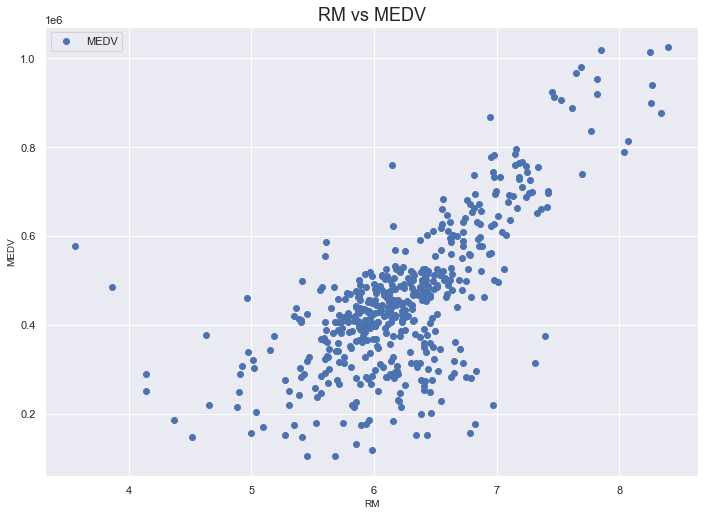

In [13]:
df.plot(x='RM', y='MEDV', style='o')  
plt.title('RM vs MEDV', fontsize= 18)    
plt.xlabel('RM',fontsize = 10)  
plt.ylabel('MEDV',fontsize = 10)  
plt.show()

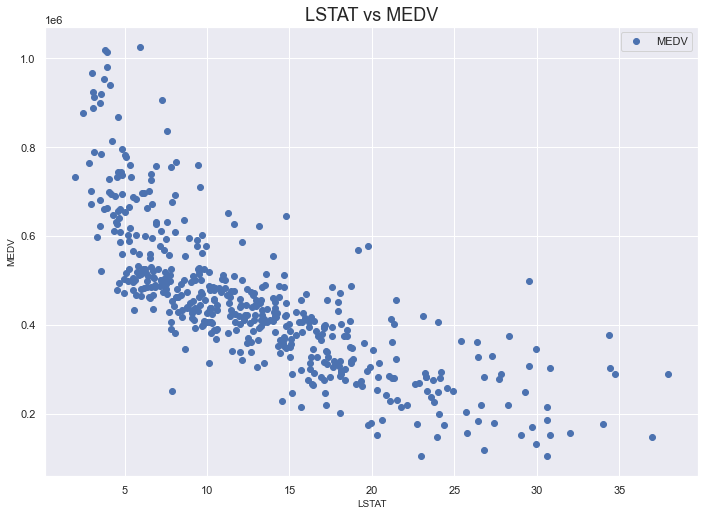

In [14]:
df.plot(x='LSTAT', y='MEDV', style='o')  
plt.title('LSTAT vs MEDV', fontsize= 18)   
plt.xlabel('LSTAT',fontsize = 10)  
plt.ylabel('MEDV',fontsize = 10)  
plt.show()

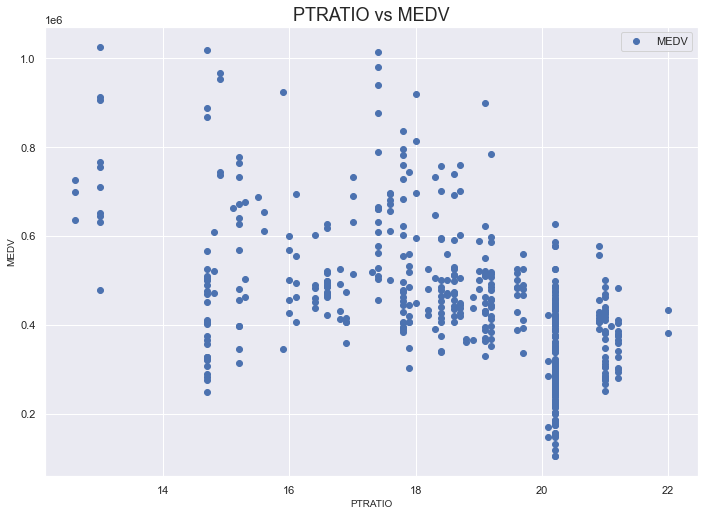

In [15]:
df.plot(x='PTRATIO', y='MEDV', style='o')  
plt.title('PTRATIO vs MEDV', fontsize= 18)   
plt.xlabel('PTRATIO',fontsize = 10)  
plt.ylabel('MEDV',fontsize = 10)  
plt.show()

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(391, 3)
(98, 3)
(391,)
(98,)


In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

LinearRegression()

In [36]:
from sklearn import metrics                              # model evaluation for training set
y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
r2 = metrics.r2_score(y_train, y_train_predict)
rmse

87771.10980988554

In [28]:
r2

0.7103793779017609

In [29]:
y_test_predict = lin_model.predict(X_test)                      # model evaluation for testing set
rmse = (np.sqrt(mean_squared_error(y_test, y_test_predict)))
r2 = metrics.r2_score(y_test, y_test_predict)
rmse

88710.55452921003

In [30]:
r2

0.7376092911908392